In [1]:
import numpy as np
import openturns as ot
from dependence import ConservativeEstimate
from dependence import quantile_func
import dask
from dependence.utils import get_grid_sample
from dependence.tests.test_functions import func_cum_sum_weight

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
K = 500
n = 100000
dim = 4
alpha = 0.05
q_func = quantile_func(alpha)
margins = [ot.Uniform(-i + (-1)**i, i+1 + (-1)**(i+1)) for i in range(1, dim+1)]
families = np.tril(np.ones((dim, dim)), k=-1)
test_func = lambda x: func_cum_sum_weight(x, use_sum=False)
quant_estimate = ConservativeEstimate(test_func, margins, families)

In [3]:
grid_result = quant_estimate.gridsearch(K, n, q_func=q_func)

In [4]:
indep_result = quant_estimate.independence(int(1E6), q_func=q_func)
grid_result.q_func = q_func
kendalls = grid_result.kendalls
quantiles = grid_result.quantities

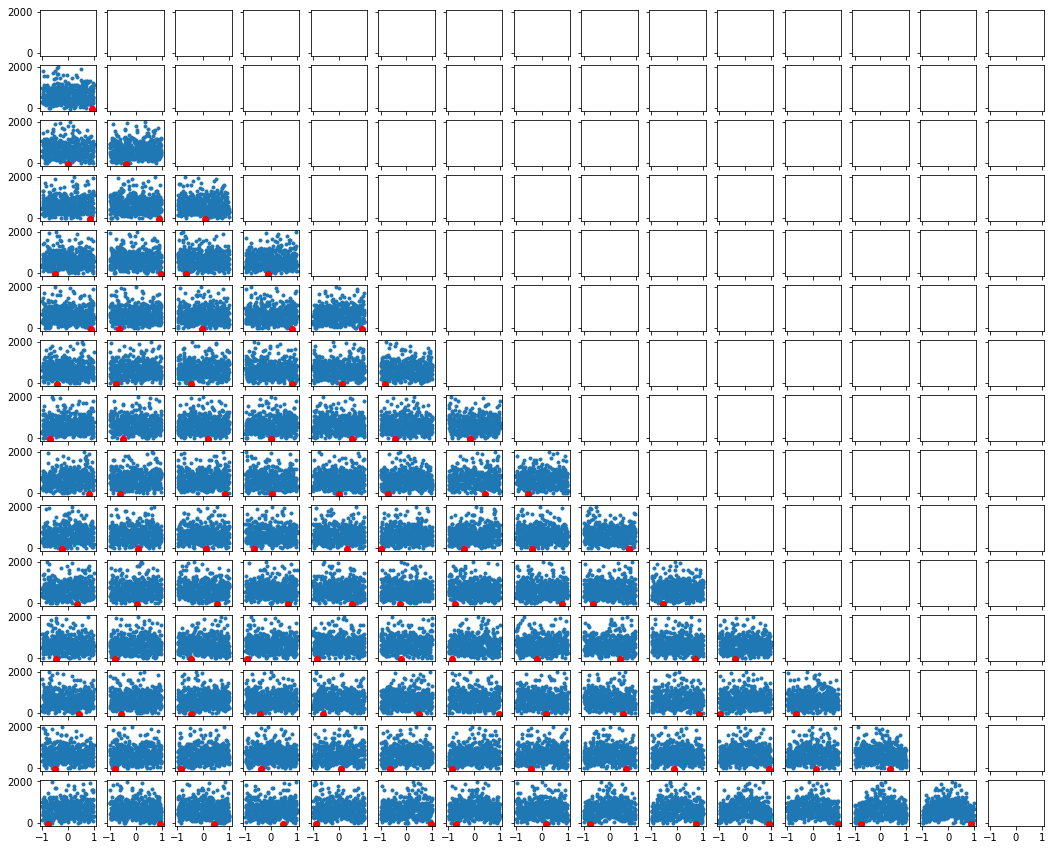

In [14]:
fig, axes = plt.subplots(dim, dim, figsize=(18, 15), sharex=True, sharey=True)

min_kendall = grid_result.min_result.kendall_tau
q_min = grid_result.min_quantity
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(kendalls[:, k], quantiles, '.')
        ax.plot(min_kendall[k], q_min, 'or')
        k += 1

In [9]:
grid_result.min_quantity, indep_result.quantity

(-51.283269304675649, 6922.112047985303)

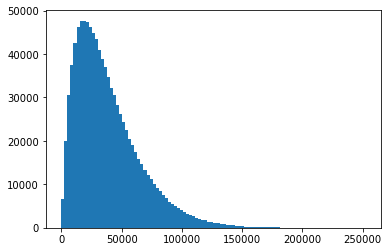

In [12]:
plt.hist(indep_result.output_sample, bins=100);

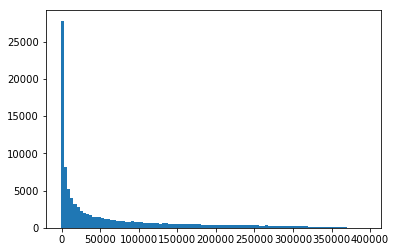

In [13]:
plt.hist(grid_result.min_result.output_sample, bins=100);

In [17]:

theta_dev = 0.3
alpha = 0.05

# Generate input samples for each params
q_estimate = ConservativeEstimate(lambda x:None, margins, families)

corr_dim = q_estimate.corr_dim_

indep_sample = q_estimate._get_sample([0.]*corr_dim, n_sample)

In [18]:
bounds = q_estimate._bounds_par_list
params = get_grid_sample(bounds, n_dep_param, 'lhs')
input_samples = []
for param in params:
    input_samples.append(q_estimate._get_sample(param, n_sample))

SystemError: <built-in function DistributionImplementation_computeQuantile> returned a result with an error set

In [7]:
def compute_quantiles(f, input_samples, alpha=0.05):
    delay = [dask.delayed(f)(input_sample) for input_sample in input_samples]
    output_samples = dask.delayed(delay).compute()
    quantiles = quantile_func(alpha)(output_samples)
    return quantiles

In [11]:
def objective(x):
    f = lambda sample: new_func(sample, const=x)
    quantiles = compute_quantiles(f, input_samples, alpha)
    indep_quant = quantile_func(alpha)(f(indep_sample).reshape(1, -1))[0]
    min_dep_param = params[quantiles.argmin()]
    
    constraint = 0.
    for param_i in min_dep_param:
        if param_i >= 0:
            if param_i < theta_dev:
                constraint = 1
            elif param_i > 1. - theta_dev :
                constraint = 1
        else:
            if param_i > -theta_dev:
                constraint = 1
            elif param_i < -1. + theta_dev :
                constraint = 1
    
    print(min_dep_param)
    return -(indep_quant - quantiles.min())**2 * (1 - constraint)

In [12]:
from skopt import gp_minimize
space = [(-1., 1.)]*(dim + corr_dim)

res = gp_minimize(objective, space, n_calls=200, verbose=True, n_random_starts=100, noise=1.E-10)

Iteration No: 1 started. Evaluating function at random point.
[-0.10998642957298266, 0.8298976049597784, -0.6299222784634462, 0.8498951376094115, -0.12998396222261588, 0.9698803335072108]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.0174
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 2 started. Evaluating function at random point.
[-0.48993954991601363, -0.3499568213685812, 0.129983962222616, 0.9498828008575775, 0.9898778661568439, -0.04999383162408311]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.0399
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 3 started. Evaluating function at random point.
[0.4699420172663804, -0.22997162547078187, 0.4499444846167473, -0.5099370825656468, 0.9098877355583113, 0.7699050070108786]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.0183
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 4 started. Evaluating func

[-0.06999136427371622, 0.9898778661568439, 0.6699173437627126, -0.06999136427371622, -0.029996298974449886, -0.42994695196711397]
Iteration No: 27 ended. Evaluation done at random point.
Time taken: 1.9553
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 28 started. Evaluating function at random point.
[-0.4499444846167472, 0.8698926702590448, -0.2499691581204151, -0.329959288718948, -0.7899025396605118, -0.28996422341968164]
Iteration No: 28 ended. Evaluation done at random point.
Time taken: 1.9051
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 29 started. Evaluating function at random point.
[0.4699420172663804, -0.22997162547078187, 0.4499444846167473, -0.5099370825656468, 0.9098877355583113, 0.7699050070108786]
Iteration No: 29 ended. Evaluation done at random point.
Time taken: 1.9522
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 30 started. Evaluating function at random point.
[-0.10998642957298266, 0.8298

[-0.4499444846167472, 0.8698926702590448, -0.2499691581204151, -0.329959288718948, -0.7899025396605118, -0.28996422341968164]
Iteration No: 53 ended. Evaluation done at random point.
Time taken: 2.0632
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 54 started. Evaluating function at random point.
[-0.06999136427371622, 0.9898778661568439, 0.6699173437627126, -0.06999136427371622, -0.029996298974449886, -0.42994695196711397]
Iteration No: 54 ended. Evaluation done at random point.
Time taken: 1.9286
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 55 started. Evaluating function at random point.
[-0.06999136427371622, 0.9898778661568439, 0.6699173437627126, -0.06999136427371622, -0.029996298974449886, -0.42994695196711397]
Iteration No: 55 ended. Evaluation done at random point.
Time taken: 1.9568
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 56 started. Evaluating function at random point.
[-0.10998642957298266, 

[-0.08998889692334944, 0.029996298974449775, -0.8898902029086779, -0.2499691581204151, 0.2499691581204151, 0.9498828008575775]
Iteration No: 79 ended. Evaluation done at random point.
Time taken: 2.2412
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 80 started. Evaluating function at random point.
[-0.08998889692334944, 0.029996298974449775, -0.8898902029086779, -0.2499691581204151, 0.2499691581204151, 0.9498828008575775]
Iteration No: 80 ended. Evaluation done at random point.
Time taken: 2.2978
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 81 started. Evaluating function at random point.
[0.8498951376094115, 0.6499198111130795, -0.1499814948722491, -0.3699543540182144, 0.22997162547078198, -0.989877866156844]
Iteration No: 81 ended. Evaluation done at random point.
Time taken: 2.2731
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 82 started. Evaluating function at random point.
[0.18997656017151554, -0.909887

Iteration No: 104 ended. Search finished for the next optimal point.
Time taken: 3.4335
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 105 started. Searching for the next optimal point.
[-0.4499444846167472, 0.8698926702590448, -0.2499691581204151, -0.329959288718948, -0.7899025396605118, -0.28996422341968164]
Iteration No: 105 ended. Search finished for the next optimal point.
Time taken: 3.1265
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 106 started. Searching for the next optimal point.
[-0.10998642957298266, 0.8298976049597784, -0.6299222784634462, 0.8498951376094115, -0.12998396222261588, 0.9698803335072108]
Iteration No: 106 ended. Search finished for the next optimal point.
Time taken: 3.0249
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 107 started. Searching for the next optimal point.
[-0.10998642957298266, 0.8298976049597784, -0.6299222784634462, 0.8498951376094115, -0.12998396222261588, 0.9698803

[-0.48993954991601363, -0.3499568213685812, 0.129983962222616, 0.9498828008575775, 0.9898778661568439, -0.04999383162408311]
Iteration No: 129 ended. Search finished for the next optimal point.
Time taken: 3.4940
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 130 started. Searching for the next optimal point.
[0.9898778661568439, -0.609924745813813, 0.7899025396605119, -0.7499074743612455, 0.8898902029086782, 0.9898778661568439]
Iteration No: 130 ended. Search finished for the next optimal point.
Time taken: 3.4300
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 131 started. Searching for the next optimal point.
[-0.10998642957298266, 0.8298976049597784, -0.6299222784634462, 0.8498951376094115, -0.12998396222261588, 0.9698803335072108]
Iteration No: 131 ended. Search finished for the next optimal point.
Time taken: 3.5325
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 132 started. Searching for the next optimal p

[0.6499198111130795, -0.20997409282114865, -0.2699666907700484, 0.8698926702590448, 0.7699050070108786, 0.9098877355583113]
Iteration No: 154 ended. Search finished for the next optimal point.
Time taken: 3.9638
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 155 started. Searching for the next optimal point.
[-0.10998642957298266, 0.8298976049597784, -0.6299222784634462, 0.8498951376094115, -0.12998396222261588, 0.9698803335072108]
Iteration No: 155 ended. Search finished for the next optimal point.
Time taken: 3.9982
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 156 started. Searching for the next optimal point.
[-0.08998889692334944, 0.029996298974449775, -0.8898902029086779, -0.2499691581204151, 0.2499691581204151, 0.9498828008575775]
Iteration No: 156 ended. Search finished for the next optimal point.
Time taken: 3.9102
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 157 started. Searching for the next optim

[-0.4499444846167472, 0.8698926702590448, -0.2499691581204151, -0.329959288718948, -0.7899025396605118, -0.28996422341968164]
Iteration No: 179 ended. Search finished for the next optimal point.
Time taken: 4.6991
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 180 started. Searching for the next optimal point.
[0.8498951376094115, 0.6499198111130795, -0.1499814948722491, -0.3699543540182144, 0.22997162547078198, -0.989877866156844]
Iteration No: 180 ended. Search finished for the next optimal point.
Time taken: 4.5892
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 181 started. Searching for the next optimal point.
[-0.06999136427371622, 0.9898778661568439, 0.6699173437627126, -0.06999136427371622, -0.029996298974449886, -0.42994695196711397]
Iteration No: 181 ended. Search finished for the next optimal point.
Time taken: 4.5909
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 182 started. Searching for the next op

In [9]:
margins

[class=Uniform name=Uniform dimension=1 a=-2 b=3,
 class=Uniform name=Uniform dimension=1 a=-1 b=2,
 class=Uniform name=Uniform dimension=1 a=-4 b=5]

In [10]:
res.x

[0.58024687749583681, -1, -1.0, 0]

In [11]:
res.x

[0.58024687749583681, -1, -1.0, 0]

In [12]:
def obj_quant(x):
    obj = lambda sample: func(sample, a=x)
    quantiles = compute_quantiles(obj, input_samples, alpha)
    return quantiles

In [13]:
q = obj_quant(res.x)

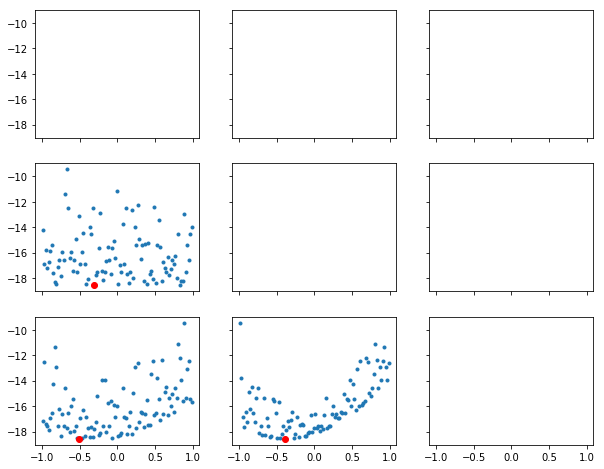

In [14]:
fig, axes = plt.subplots(dim, dim, figsize=(10, 8), sharex=True, sharey=True)

min_params = params[q.argmin()]
q_min = q.min()
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(np.asarray(params)[:, k], q, '.')
        ax.plot(min_params[k], q_min, 'or')
        k += 1

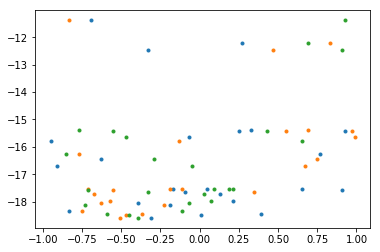

In [17]:
plt.plot(params[:-25:-1], q[:-25:-1], '.')

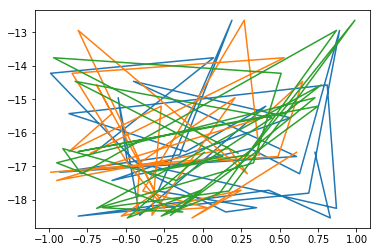

In [16]:
plt.plot(params[:30], q[:30])

In [ ]:
q.min()